## Perceptron Algorithm

In [13]:
import random as rd
import numpy as np
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt
from math import *
%matplotlib inline

In [14]:
mu1 = -1
mu2 = 3
sig1 = 0.5
sig2 = 1
N = 100

In [15]:
np.random.seed(10)
x11=np.random.randn(N,1)*sig1 + mu1
x12=np.random.randn(N,1)*sig1 + mu1+3
x21=np.random.randn(N,1)*sig2 + mu2
x22=np.random.randn(N,1)*sig2 + mu2+3
c = np.vstack((-np.ones((N,1)), np.ones((N,1))))
x1 = np.hstack((x11,x12))
x2 = np.hstack((x21,x22))

In [16]:
X = np.hstack( (np.vstack( (x1,x2) ),c) )
np.random.shuffle(X)
dataset = pd.DataFrame(data=X, columns=['x','y','c'])

## Our dataset

In [17]:
dataset.head()


,x,y,c
0,-0.334207,2.058738,-1.0
1,3.264395,5.636814,1.0
2,-0.669884,1.856185,-1.0
3,1.995284,4.484924,1.0
4,3.588041,4.739172,1.0


## Let's plot our features

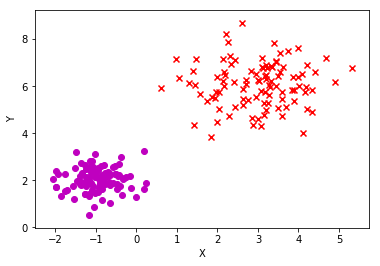

In [18]:
X_1=dataset.drop(['c'],axis=1).values
Y=dataset['c']
# Plotting Toy data
plt.figure()
for index, x in enumerate(X_1):
    if Y[index] == -1:
        plt.scatter(x[0], x[1], c = 'm', marker = 'o')
    else:
        plt.scatter(x[0], x[1], c = 'r', marker = 'x')

plt.xlabel("X")
plt.ylabel("Y")
plt.show()

In [35]:
'''Missclass return the list misslassified points'''

def Missclass(X,W,Y):
    Y_predict=[]
    for i in range(X.shape[0]):
        y= (np.sign(np.dot(X[i,:], W)))
        Y_predict.append(y)
    missclass=[]
    for index in range(len(Y)):
        if Y_predict[index]!=Y[index]:
            missclass.append(index)
    return missclass

In [36]:
'''Gradient compute de gradient '''
def gradient(M,X,Y):
    gradient = -sum([Y[i]*X[i,:] for i in M])
    return gradient    

In [37]:
'''Update the weight for each iteration'''

def update_W(X,W,Y):
    M=Missclass(X,W,Y)
    if M!=[]:
        W_o=W
        grad=gradient(M,X,Y)
        W=W-lr*grad
        while(np.linalg.norm(W_o-W)>epsilon):
            M=Missclass(X,W,Y)
            if M!=[]:
                W_o=W
                grad=gradient(M,X,Y)
                W=W-lr*grad
            else:
                break
    return W

In [49]:
X = np.insert(X_1, 0, np.ones( X_1.shape[0]), axis=1)


In [50]:
# insert column 1 to X_1
X = np.insert(X_1, 0, np.ones( X_1.shape[0]), axis=1)
Y=dataset['c']
W = np.array([-3,2.0,0.5])
lr=0.8
epsilon=1e-5

In [52]:
#update w
w=update_W(X,W,Y)
w

array([-3. ,  2. ,  0.5])

In [53]:
'''define the line'''
def line(w,x):
    return -(w[0]/w[2])-(w[1]/w[2])*x

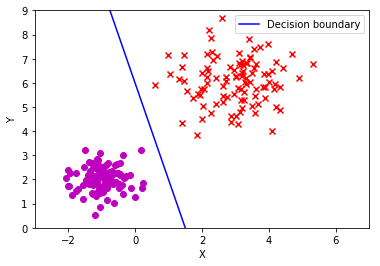

In [54]:
#Plot
x=np.arange(-2,8,0.01)
X_1=dataset.drop(['c'],axis=1).values
Y=dataset['c']
# Plotting Toy data
plt.figure()
for index, x in enumerate(X_1):
    if Y[index] == -1:
        plt.scatter(x[0], x[1], c = 'm', marker = 'o')
    else:
        plt.scatter(x[0], x[1], c = 'r', marker = 'x')

plt.plot(x,line(w,x),color='b',label='Decision boundary')
plt.legend(loc = "best")
plt.xlabel("X")
plt.ylabel("Y")
plt.xlim(-3,7)
plt.ylim(0,9)
plt.show()

## Thanks!